## 1. Tworzenie macierzy spokrewnień

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('pedigree2.txt', sep='\t') #wczytanie danych pedigree
dane=data.as_matrix()

data.head()

,animal,sire,dam
0,106,5,82
1,107,1,15
2,108,1,97
3,109,3,99
4,110,4,88


In [299]:
def RelMatrixA(s,d):
    n = len(s)
    N = n + 1
    A = np.zeros((N,N))
    s = ( s == 0 ) * N + s
    d = ( d == 0 ) * N + d
    for i in range(n):
        A[i,i] = 1 + A[s[i]-1, d[i]-1] * 0.5
        for j in range(i+1,n):
            if j > n:
                break
            A[i,j] = (A[i,s[j]-1] + A[i,d[j]-1]) * 0.5
            A[j,i] = A[i,j]
    return A

In [300]:
n = len(dane[:,0])
wynik = RelMatrixA(dane[:,1],dane[:,2])[0:n,0:n]
print(wynik)

[[ 1.          0.5         0.5        ...,  0.5         0.265625    0.3125    ]
 [ 0.5         1.125       0.25       ...,  0.25        0.1328125   0.15625   ]
 [ 0.5         0.25        1.15625    ...,  0.703125    0.61425781
   0.26953125]
 ..., 
 [ 0.5         0.25        0.703125   ...,  1.125       0.37353516
   0.21289062]
 [ 0.265625    0.1328125   0.61425781 ...,  0.37353516  1.2131958
   0.33037567]
 [ 0.3125      0.15625     0.26953125 ...,  0.21289062  0.33037567  1.03125   ]]


## 2. Predykcja dla zbioru testowego

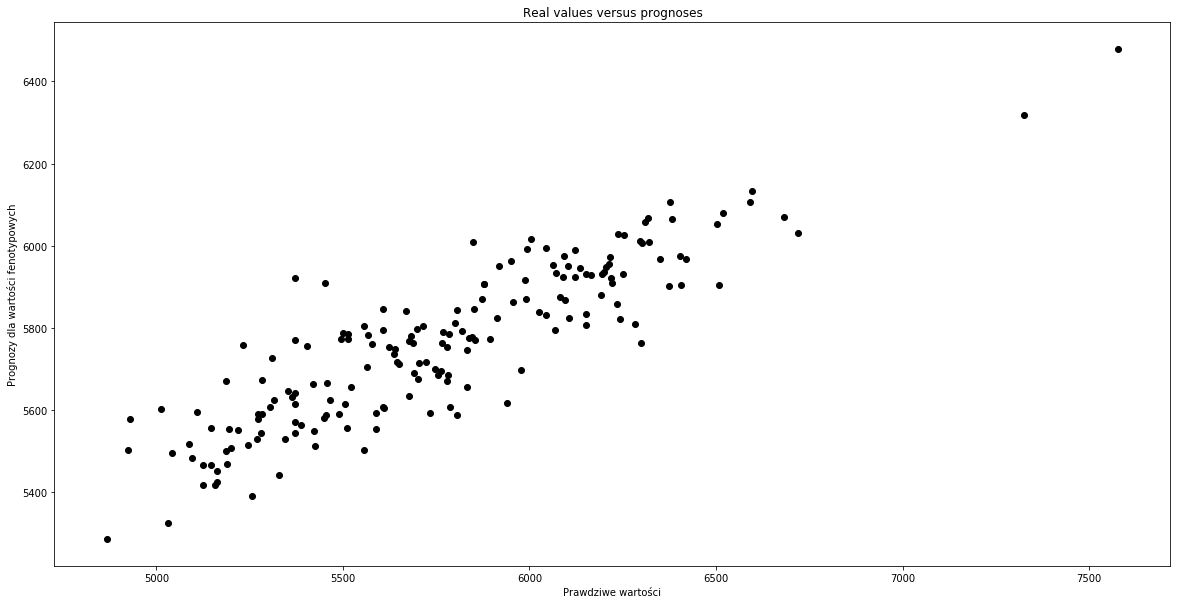

In [301]:
dane_hod=pd.read_csv('dane_b_walid.txt', sep='\t') #wczytanie danych 
dane_hodowlane=dane_hod.as_matrix()
y = dane_hodowlane[:,1]
h2 = 0.48
x = np.full((len(y),1), 1)
z = np.zeros((len(y),len(y)+20))
np.fill_diagonal(z,1)
np.savetxt('macierz_stalych_testowy.txt',x)
np.savetxt('macierz_losowych_testowy.txt',z)
A = wynik
odwrA=np.linalg.inv(A)
x_t = x.transpose()
z_t = z.transpose()
L11=x_t.dot(x)
L21=z_t.dot(x)
L12=x_t.dot(z)
L22=z_t.dot(z)+odwrA*(1-h2)/h2
L1 =np.column_stack((L11, L12))
L2 =np.column_stack((L21, L22))
L = np.concatenate([L1, L2])
odwrL = np.linalg.pinv(L)
P1 = x_t.dot(y)
P2 = z_t.dot(y)
P = np.concatenate([P1, P2])
result=odwrL.dot(P)
b = result[0]
a = result[1:]
predy = x.dot(b) + z.dot(a)
e = predy - y

plt.figure(figsize=(20,10))
for i in range(len(predy)):
    plt.scatter(y[i], predy[i][i], color = 'black')
plt.title('Real values versus prognoses')
plt.xlabel('Prawdziwe wartości')
plt.ylabel('Prognozy dla wartości fenotypowych')
plt.show()

In [305]:
from scipy import stats
predylist = []
for i in range(len(predy)):
    predylist.append(predy[i][i])
corr = stats.pearsonr(predylist, y)
print('Korelacja Pearsona: %15s' % corr[0])
print('Wartość p: %27s' % corr[1])
print(len(dane_hodowlane[:,1]))

Korelacja Pearsona:  0.885078732683
Wartość p:           5.11016126364e-61
180


# 3. Predykcja dla zbioru walidacyjnego

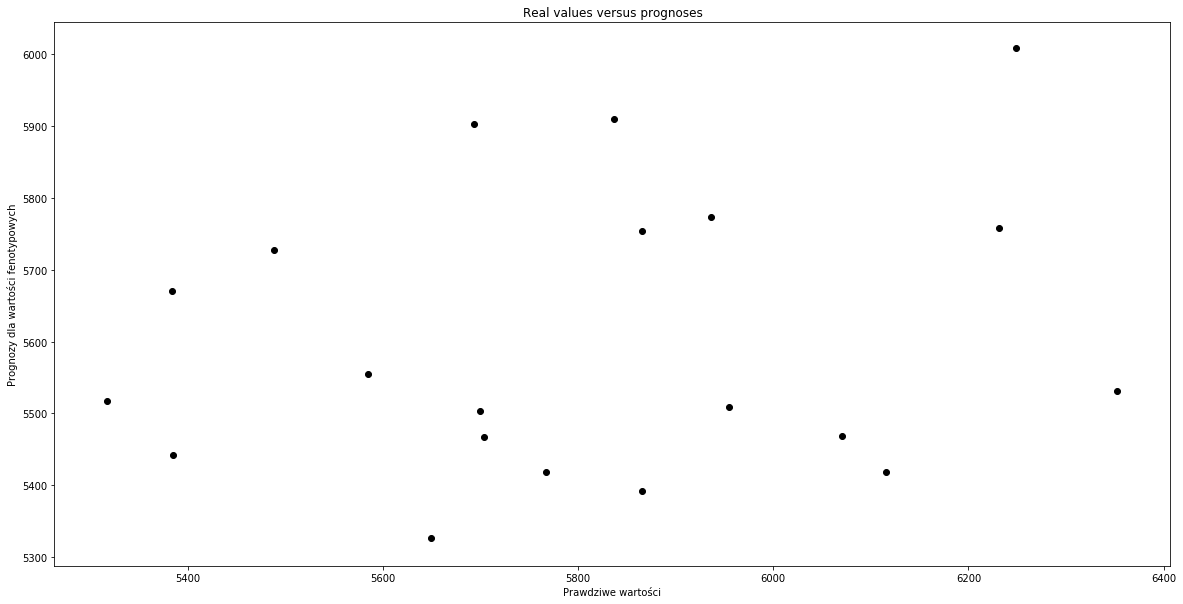

In [306]:
dane = pd.read_csv('walid.txt', sep='\t')
dane=dane.as_matrix()
y = dane[:,1]
x = np.full((len(y),1), 1)
np.savetxt('macierz_stalych_walidacyjny.txt',x)
z = np.zeros((len(y),len(y)+len(dane_hodowlane[:,1])))
np.fill_diagonal(z,1)
np.savetxt('macierz_losowych_walidacyjny.txt',z)
predy = x.dot(b) + z.dot(a)
e = predy - y
plt.figure(figsize=(20,10))
for i in range(len(predy)):
    plt.scatter(y[i], predy[i][i], color = 'black')
plt.title('Real values versus prognoses')
plt.xlabel('Prawdziwe wartości')
plt.ylabel('Prognozy dla wartości fenotypowych')
plt.show()

In [309]:
predylist = []
for i in range(len(predy)):
    predylist.append(predy[i][i])
corr = stats.pearsonr(predylist, y)
print('Korelacja Pearsona: %15s' % corr[0])
print('Wartość p: %24s' % corr[1])

Korelacja Pearsona:  0.198789968625
Wartość p:           0.400793015735
